In [1]:
import pandas as pd
import pandas as pd1
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy

%matplotlib inline

In [3]:
# Read csv document and start data wrangling.

df=pd.read_csv('/Users/Alan/Desktop/Udacity-Project2/tmdb-movies.csv')

df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
## Only grab the columns that we want to analyze
df = df[["id", "popularity", "budget", "revenue", "original_title", "cast", "director", "genres", "production_companies","release_date", "vote_count", "vote_average", "release_year", "budget_adj", "revenue_adj"]]
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
## View missing value count for each feature.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
## Find out the duplicated data
sum(df.duplicated())

1

In [13]:
## Remove duplicates data
df.drop_duplicates()

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [ ]:
# we start to sort some data in order to answer questons

In [15]:
## Question1 - Who are the 15 most productive diretors ?
df['director'].value_counts()[:15]

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Barry Levinson       19
Wes Craven           19
John Carpenter       18
Rob Reiner           18
Mike Nichols         18
Name: director, dtype: int64

In [16]:
## Question2 - 10 best rating movies 

### Before getting started with this -

### we need a metric to score or rate movie
### Calculate the score for every movie
### Sort the scores and recommend the best rated movie to the users.
### We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 
### 9.0 average rating and only 2 votes cannot be considered better than the movie with 
### 7.0 as as average rating but 60 votes. 
### so, I'll be using IMDB's weighted rating (wr) which is given as


#### V is the number of votes for the movie;
#### M is the minimum votes required to be listed in the chart;
#### R is the average rating of the movie; And
#### C is the mean vote across the whole report
#### We already have v(vote_count) and R (vote_average) and C can be calculated as

C= df['vote_average'].mean()
C

5.974921774342001

In [17]:
### The next step is to determine an appropriate value for M, 
### the minimum votes required to be listed in the chart. 
### We will use 90th percentile as our cutoff. 
### In other words, for a movie to feature in the statistic, 
### it must have more votes than at least 50% of the movies in the list.

M= df['vote_count'].quantile(0.5)
M

38.0

In [18]:
### Now, we can filter out the movies that qualify for the chart 

q_movies = df.copy().loc[df['vote_count'] >= M]
q_movies.shape

(5469, 15)

In [19]:
def weighted_rating(x, M=M, C=C):
    V = x['vote_count']
    R = x['vote_average']
#### Calculation based on the IMDB formula
    return (V/(V+M) * R) + (M/(M+V) * C)


## Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [21]:
## Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies
### Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

## let's see the top 10 movies with highest scores.
q_movies[['score','original_title','director','production_companies','revenue']].head(1)

,score,original_title,director,production_companies,revenue
4178,8.38409,The Shawshank Redemption,Frank Darabont,Castle Rock Entertainment,28341469


In [22]:
### query my favorite movie and find out the score
q_movies.query('original_title=="Prometheus"')

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
4368,70981,4.008188,130000000,403170142,Prometheus,Noomi Rapace|Michael Fassbender|Charlize Thero...,Ridley Scott,Science Fiction|Adventure|Mystery,Twentieth Century Fox Film Corporation|Dune En...,5/30/12,3559,6.2,2012,1.234668e+08,3.829085e+08,6.197622


In [23]:
## only query the columns needed
q_movies1=q_movies[['id','original_title','score']]

In [24]:
q_movies1.head(1)

,id,original_title,score
4178,278,The Shawshank Redemption,8.38409


In [25]:

## Categorized the score Rating level into 4 units ['Poor Rating', 'Fair Rating', 'Good Rating', 'Excellent Rating']

q_movies1.score.describe()

count    5469.000000
mean        6.166537
std         0.633971
min         3.465375
25%         5.738693
50%         6.149983
75%         6.570009
max         8.384090
Name: score, dtype: float64

In [28]:
bin_edges = [3.465375,5.738693,6.149983,6.570009,8.384090 ]
bin_names = ['Poor Rating', 'Fair Rating', 'Good Rating', 'Excellent Rating']

q_movies1['Rating_Level']=pd.cut(q_movies['score'],bin_edges,labels=bin_names)
q_movies1.head(3)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,original_title,score,Rating_Level
4178,278,The Shawshank Redemption,8.384090,Excellent Rating
7269,238,The Godfather,8.277956,Excellent Rating
650,244786,Whiplash,8.164916,Excellent Rating


In [29]:
## find out my favious movie's Rating_Level
q_movies1.query('original_title=="Prometheus"')

,id,original_title,score,Rating_Level
4368,70981,Prometheus,6.197622,Good Rating


In [30]:
q_movies1.columns

Index(['id', 'original_title', 'score', 'Rating_Level'], dtype='object')

In [31]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [32]:
## Question-3 list the 10 movies with highest rating and rank them.
q_movies1.shape

(5469, 4)

In [34]:
### Creating the column for 'score' ranking 

col1 = q_movies1["score"].astype(str) 

q_movies1['Rating_Rank'] = (col1).astype(float).rank(method='dense', ascending=False).astype(float)
Rating_Rank=q_movies1.sort_values('Rating_Rank')
Rating_Rank.head(5)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,original_title,score,Rating_Level,Rating_Rank
4178,278,The Shawshank Redemption,8.384090,Excellent Rating,1.0
7269,238,The Godfather,8.277956,Excellent Rating,2.0
650,244786,Whiplash,8.164916,Excellent Rating,3.0
2875,155,The Dark Knight,8.090466,Excellent Rating,4.0
2409,550,Fight Club,8.086453,Excellent Rating,5.0


In [35]:
## Merge 'df' to 'q_movies1'
combined1 = pd.merge(df, q_movies1, on=['id','original_title'])

In [36]:
combined1.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'score', 'Rating_Level', 'Rating_Rank'],
      dtype='object')

In [37]:
# find out the score, Rating_level and Rating_Rank of my favious movie
combined1.query('original_title=="Prometheus"')

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level,Rating_Rank
2290,70981,4.008188,130000000,403170142,Prometheus,Noomi Rapace|Michael Fassbender|Charlize Thero...,Ridley Scott,Science Fiction|Adventure|Mystery,Twentieth Century Fox Film Corporation|Dune En...,5/30/12,3559,6.2,2012,1.234668e+08,3.829085e+08,6.197622,Good Rating,2088.0


In [38]:
# Question 4 Calculate the profit, append the column to the df and categorized them.
# list the 10 most profitable movies

df['profit']=(df.revenue-df.budget)
df_profit=df.sort_values('profit',ascending=False)
df_profit1=df_profit[['id','original_title','profit']]
df_profit1.columns

Index(['id', 'original_title', 'profit'], dtype='object')

In [39]:
df_profit1.profit.describe()

count    1.086600e+04
mean     2.519762e+07
std      9.658799e+07
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      9.083358e+06
max      2.544506e+09
Name: profit, dtype: float64

In [40]:
### make the "profit" figuer more easy to read
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.profit.describe()

count        10866.00000
mean      25197618.69925
std       96587985.97157
min     -413912431.00000
25%              0.00000
50%              0.00000
75%        9083358.00000
max     2544505847.00000
Name: profit, dtype: float64

In [41]:
### Categorized the 'Profit_level' into 4 units ['Loose Money', 'No Profit', 'Ok Profit', 'Great Profit']

bin_edges = [-413912431,0,1000000,9083358,2544505847 ]
bin_names = ['Loose Money', 'No Profit', 'Ok Profit', 'Great Profit']

df['Profit_Level']=pd.cut(df['profit'],bin_edges,labels=bin_names)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'Profit_Level'],
      dtype='object')

In [42]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,Profit_Level
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380,1363528810,Great Profit


In [49]:
### append the column 'Profit_Rank'  into dataframe 'df'

col1 = df["profit"].astype(str) 

df['Profit_Rank'] = (col1).astype(float).rank(method='dense', ascending=False).astype(int)
df_ProfitRank=df.sort_values('Profit_Rank')
df_ProfitRank.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'Profit_Level', 'Profit_Rank'],
      dtype='object')

In [50]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'Profit_Level', 'Profit_Rank'],
      dtype='object')

In [53]:
df_ProfitRank.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,Profit_Level,Profit_Rank
1386,19995,9.43277,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10000,2009,240886902.88761,2827123750.41189,2544505847,Great Profit,1


In [54]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,Profit_Level,Profit_Rank
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380,1363528810,Great Profit,4


In [55]:
## creat new dataframe combined2 by combined the dataset(with score columns) into the new dataset(with profit columns) that appending profit,profit_level, profit_rank, score, rating_level and rating_rank
combined2 = pd.merge(df, combined1, on=['id','popularity','budget','revenue','original_title','cast','director','genres','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'])
combined2.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'Profit_Level', 'Profit_Rank', 'score',
       'Rating_Level', 'Rating_Rank'],
      dtype='object')

In [56]:
combined2.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,...,vote_average,release_year,budget_adj,revenue_adj,profit,Profit_Level,Profit_Rank,score,Rating_Level,Rating_Rank
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,...,6.50000,2015,137999939.28003,1392445892.52380,1363528810,Great Profit,4,6.49644,Good Rating,1397.00000


In [57]:
#summary up the columns we need
combined3=combined2[['id','original_title','cast','director','genres','production_companies','release_date','profit','Profit_Level','Profit_Rank','score','Rating_Level','Rating_Rank']]
combined3.columns

Index(['id', 'original_title', 'cast', 'director', 'genres',
       'production_companies', 'release_date', 'profit', 'Profit_Level',
       'Profit_Rank', 'score', 'Rating_Level', 'Rating_Rank'],
      dtype='object')

In [ ]:
## since we have the dataframe append both new 'socre' and 'profit' columns, so we can start to go further.



In [58]:
test1=combined3.groupby('Profit_Level').Rating_Level

In [61]:
test1.describe()

,count,unique,top,freq
Profit_Level,,,,
Loose Money,2372,4,Poor Rating,741
No Profit,199,4,Good Rating,55
Ok Profit,428,4,Excellent Rating,123
Great Profit,2474,4,Excellent Rating,794


In [63]:
test2=combined3.groupby('Rating_Level').Profit_Level
test2.describe()

,count,unique,top,freq
Rating_Level,,,,
Poor Rating,1373,4,Loose Money,741
Fair Rating,1367,4,Loose Money,661
Good Rating,1366,4,Great Profit,632
Excellent Rating,1367,4,Great Profit,794


In [64]:
## find out who is the 10 most profitable 'director'
### sort the directors with profit amound from high to low / used combined3 is more effective
test5=combined3.groupby('director')['profit'].sum().sort_values(ascending=False)
test5.head(10)

director
Steven Spielberg     7418813772
Peter Jackson        5197218949
James Cameron        5077953992
Michael Bay          3557208171
David Yates          3379295625
Chris Columbus       3202660711
Christopher Nolan    3162548502
George Lucas         2955996893
Robert Zemeckis      2842975548
J.J. Abrams          2839169916
Name: profit, dtype: int64

In [65]:
## find out the most average 'hight score' director
### sorting  the director with highest movies score, from high to low 
test6=combined3.groupby('director')['score'].mean().sort_values(ascending=False)

test6.head(10)

director
Damien Chazelle                                                                                                  8.16492
Pete Docter                                                                                                      7.98063
John Kahrs                                                                                                       7.85880
Patrick Osborne                                                                                                  7.78384
Don Hall|Chris Williams                                                                                          7.78358
Phil Alden Robinson|Richard Loncraine|Mikael Salomon|David Nutter|Tom Hanks|David Leland|David Frankel|Tony To   7.78076
Richard Marquand                                                                                                 7.77791
Doug Sweetland                                                                                                   7.75725
Tomm Moore             

In [66]:
### sorting  the genres with highest profit, from high to low 

test7=combined3.groupby('genres')['profit'].mean().sort_values(ascending=False)
test7.head(10)

genres
Crime|Drama|Mystery|Thriller|Action                 1084279658.00000
Action|Adventure|Science Fiction|Fantasy             934089112.50000
Family|Fantasy|Adventure                             825467110.00000
Adventure|Fantasy|Family|Mystery                     788212738.00000
Science Fiction|Adventure|Family|Fantasy             782410554.00000
Family|Animation|Drama                               743241776.00000
Science Fiction|Thriller|Action|Adventure            717423452.00000
Action|Thriller|Science Fiction|Mystery|Adventure    665500000.00000
Science Fiction|Adventure|Thriller                   627100229.00000
Science Fiction|Adventure|Fantasy                    616210692.00000
Name: profit, dtype: float64

In [68]:
# sorting  the genres(or genres combination) with highest movies score, from high to low

test8=combined3.groupby('genres')['score'].mean().sort_values(ascending=False)
test8.head(10)

genres
History|Drama|Thriller|War                          7.97811
Fantasy|Drama|Crime                                 7.96707
Action|Thriller|Science Fiction|Mystery|Adventure   7.89254
Romance|Comedy|Animation|Drama|Family               7.78384
Adventure|Family|Animation|Action|Comedy            7.78358
Adventure|Comedy|Science Fiction|Family             7.78186
Romance|Science Fiction|Drama                       7.77181
Science Fiction|Drama|Romance                       7.76617
Science Fiction|Drama|Romance|Fantasy               7.71982
Action|Drama|Adventure                              7.68163
Name: score, dtype: float64

In [69]:
### sorting  the companies(or join productions) with highest movies score, from high to low

test9=combined3.groupby('production_companies')['profit'].mean().sort_values(ascending=False)
test9.head(10)

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment   2544505847.00000
Lucasfilm|Truenorth Productions|Bad Robot                                                                    1868178225.00000
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                           1645034188.00000
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                     1363528810.00000
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                  1316249360.00000
Warner Bros.|Heyday Films|Moving Picture Company (MPC)                                                       1202817822.00000
Marvel Studios|Prime Focus|Revolution Sun Studios                                                            1125035767.00000
WingNut Films|New Line Cinema                                                                    

In [70]:
# Filter up the data been categorized as "Excellent Rating" in "Rating_Level"
test11=combined3[combined3['Rating_Level']=='Excellent Rating']
test11.shape

(1367, 13)

In [71]:
### Filter up the data been categorized as "Great Profit" in "Profit_Level"
test12=combined3[combined3['Profit_Level']=='Great Profit']
test12.shape

(2474, 13)

In [72]:
### COMBINE DATAFRAME OVERLAPPING "Excellent Rating" and "Great Profit" 

combined4=combined3.loc[(combined3['Rating_Level'] == 'Excellent Rating') & (combined3['Profit_Level'] =='Great Profit')]
combined4.shape

(794, 13)

In [74]:
## SUMMARY UP DATAFRAM WITH THE COLUMNS ONLY NEEDED

combined4_1=combined4[['id','cast','director','genres','production_companies']]

In [75]:
combined4_1.columns

Index(['id', 'cast', 'director', 'genres', 'production_companies'], dtype='object')

In [76]:
## Query the top 10 directors meet both " excellent score" and "great profit" criteria
combined4_director=combined4_1.director.value_counts()
combined4_director.head(10)

Steven Spielberg     19
Clint Eastwood       13
Martin Scorsese       9
Woody Allen           9
Robert Zemeckis       8
Quentin Tarantino     8
David Fincher         8
Tim Burton            7
Christopher Nolan     7
Ridley Scott          7
Name: director, dtype: int64

In [77]:
## Query the top 10 genres meet both " excellent score" and "great profit" criteria
combined4_genres=combined4_1.genres.value_counts()
combined4_genres.head(10)

Drama                   85
Drama|Romance           32
Comedy                  26
Comedy|Drama            21
Crime|Drama             17
Comedy|Drama|Romance    15
Crime|Drama|Thriller    13
Drama|Crime             10
Animation|Family        10
Horror|Thriller          9
Name: genres, dtype: int64

In [78]:
## Query the top 10 production companies meet both " excellent score" and "great profit" criteria
combined4_companies=combined4_1.production_companies.value_counts()
combined4_companies.head(10)

Paramount Pictures                              23
Universal Pictures                              12
Walt Disney Pictures|Pixar Animation Studios    11
Warner Bros.                                    11
Columbia Pictures                                8
New Line Cinema                                  7
Marvel Studios                                   7
DreamWorks Animation                             6
Walt Disney Pictures                             6
Walt Disney Productions                          5
Name: production_companies, dtype: int64

In [80]:
df.shape

(10866, 18)

In [79]:
combined2.shape

(5475, 21)

In [82]:
# Try to calculate the ratio

# calculate the sum of movies producted by each production companies. 
total_companies=df.production_companies.value_counts()
total_companies.shape

(7445,)

In [83]:
total_companies.head(10)

Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

In [84]:
##### listed out the total movies meet both " excellent score" and "great profit" criteria of each production companies
combined4_companies.head(10)

Paramount Pictures                              23
Universal Pictures                              12
Walt Disney Pictures|Pixar Animation Studios    11
Warner Bros.                                    11
Columbia Pictures                                8
New Line Cinema                                  7
Marvel Studios                                   7
DreamWorks Animation                             6
Walt Disney Pictures                             6
Walt Disney Productions                          5
Name: production_companies, dtype: int64

In [85]:
### pick the big 6 production companies , calculate their "fame and gain" ratio and summary them up.
movie_ratio = pd.DataFrame({'Top6_production_companies': ['Paramount Pictures','Universal Pictures','Warner Bros.','Walt Disney Pictures','Columbia Pictures','Twentieth Century Fox Film Corporation'], 'Ratio': [23/156,12/133,11/84,11/76,8/72,5/49]})                                                                                                                                                                    
movie_ratio

,Top6_production_companies,Ratio
0,Paramount Pictures,0.14744
1,Universal Pictures,0.09023
2,Warner Bros.,0.13095
3,Walt Disney Pictures,0.14474
4,Columbia Pictures,0.11111
5,Twentieth Century Fox Film Corporation,0.10204


Text(0, 0.5, 'Ratio')

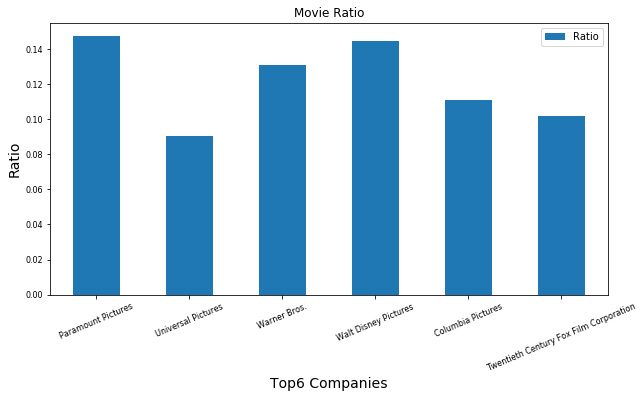

In [86]:
# Plot 1-1 : Show the bar graphic of ratio for the Production Companies with 'great profit and excellent rating'.

movie_ratio.plot.bar(figsize=(10,5),title='Movie Ratio',x="Top6_production_companies",fontsize=8,y='Ratio',rot=23)
plt.xlabel('Top6 Companies',fontsize=14)
plt.ylabel('Ratio',fontsize=14)

Text(0, 0.5, 'counts')

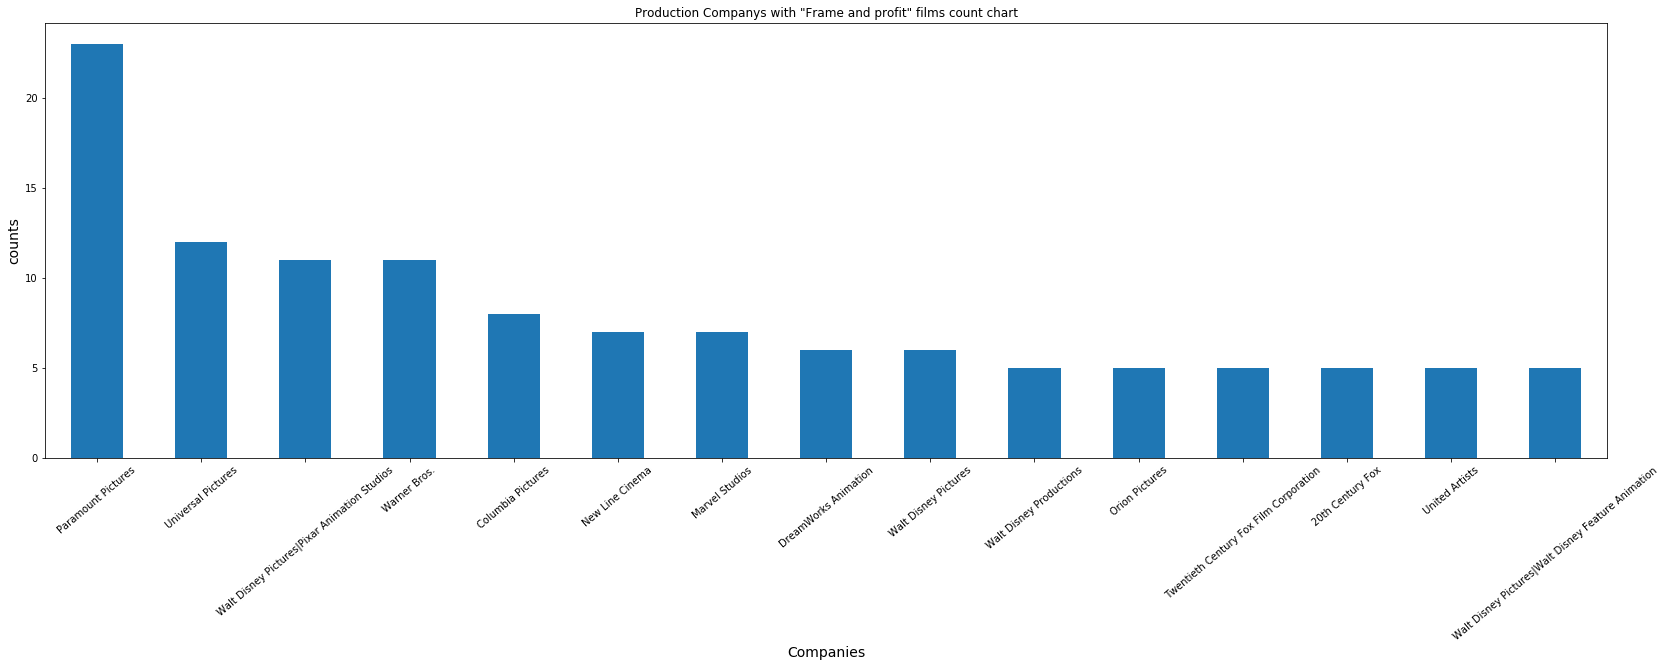

In [87]:
# Plot1-2 show the total numbers counts of the movies company with 'great profit and excellent rating'
combined4_companies.head(15).plot.bar(figsize=(28,8),title='Production Companys with "Frame and profit" films count chart',x='production_companies',y='number counts',fontsize=10,rot=40)
plt.xlabel('Companies',fontsize=14)
plt.ylabel('counts',fontsize=14)

In [88]:
### try to findout the ratio of genres overlapping 'great profit and excellent rating' columns

### list out the genres meet both 'great profit and excellent rating' criteria
combined4_genres.head(10)

Drama                   85
Drama|Romance           32
Comedy                  26
Comedy|Drama            21
Crime|Drama             17
Comedy|Drama|Romance    15
Crime|Drama|Thriller    13
Drama|Crime             10
Animation|Family        10
Horror|Thriller          9
Name: genres, dtype: int64

In [90]:
total_genres=df.genres.value_counts()
total_genres.head(7)

Comedy             712
Drama              712
Documentary        312
Drama|Romance      289
Comedy|Drama       280
Comedy|Romance     268
Horror|Thriller    259
Name: genres, dtype: int64

In [91]:
genres_ratio = pd.DataFrame({'Top6_genres': ['Drama','Drama|Romance','Comedy|Drama','Comedy','Comedy|Drama|Romance','Crime|Drama|Thriller','Crime|Drama'], 'Ratio': [85/712,32/289,21/280,26/712,15/222,13/81,17/74]})  

Text(0, 0.5, 'Ratio')

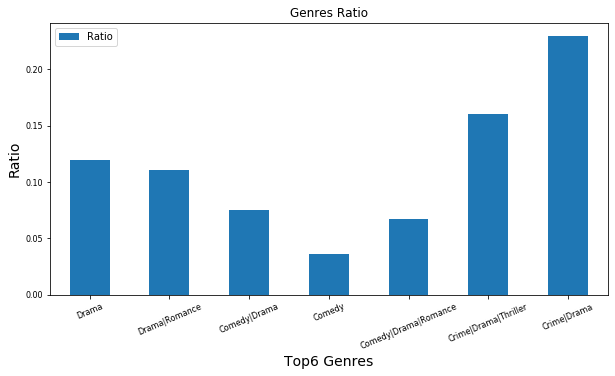

In [92]:
# Plot 2-1 : Show the bar graphic of ratio for the genres s with 'great profit and excellent rating'.

genres_ratio.plot.bar(figsize=(10,5),title='Genres Ratio',x="Top6_genres",fontsize=8,y='Ratio',rot=23)
plt.xlabel('Top6 Genres',fontsize=14)
plt.ylabel('Ratio',fontsize=14)

Text(0, 0.5, 'Ratio')

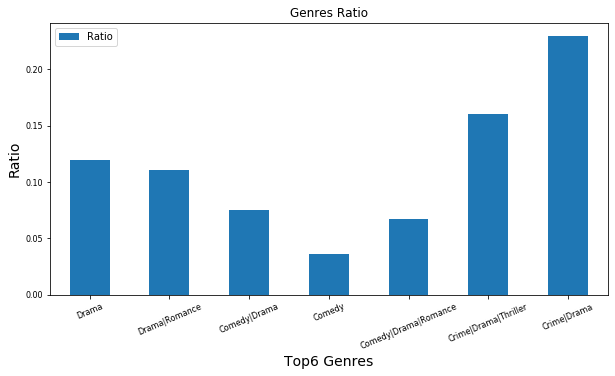

In [93]:
# Plot 2-2 : Show the bar graphic of ratio for the genres s with 'great profit and excellent rating'.

genres_ratio.plot.bar(figsize=(10,5),title='Genres Ratio',x="Top6_genres",fontsize=8,y='Ratio',rot=23)
plt.xlabel('Top6 Genres',fontsize=14)
plt.ylabel('Ratio',fontsize=14)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


correlaton : (0.2554143701295839, 2.816827741824114e-82)


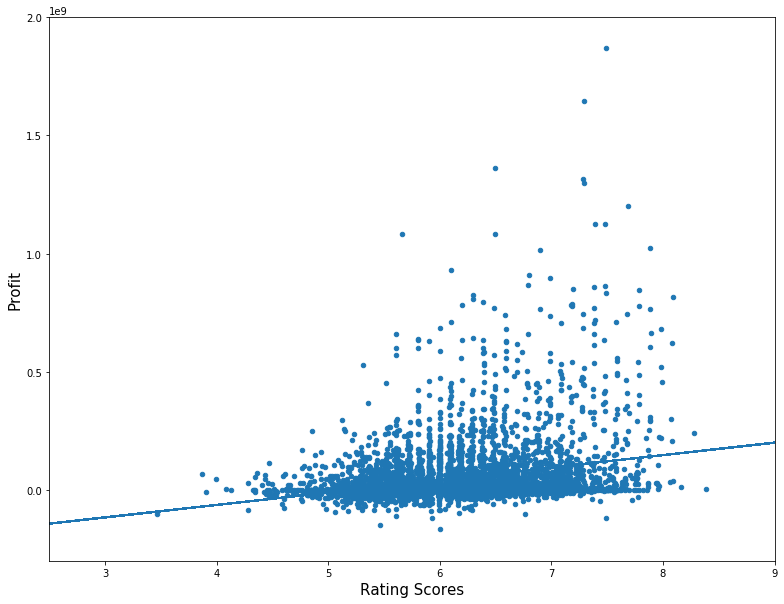

In [94]:

###  plot 3-1 Try to see the correlaton between profit and rating scores

model=sm.OLS(combined3.profit, sm.add_constant(combined3.score))
p = model.fit().params

x=combined3.profit

ax=combined3.plot(figsize=(13,10),x='score',y='profit',kind='scatter',fontsize=10)
ax.plot(x,p.const +p.score* x)
ax.set_xlim([2.5,9])
ax.set_ylim([-300000000,2000000000])
plt.xlabel('Rating Scores', fontsize=15)
plt.ylabel('Profit', fontsize=15)
print("correlaton :", scipy.stats.pearsonr(combined3.score, combined3.profit))

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


correlaton : (0.5450584566984787, 0.0)


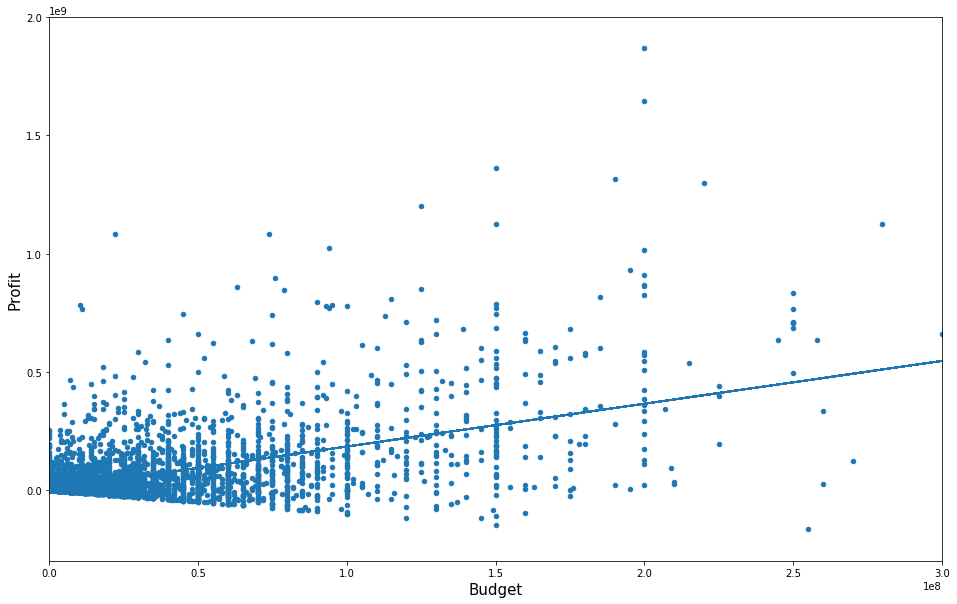

In [95]:
### Plt 3-2 Try to see the correlation between profit and budget

model=sm.OLS(combined2.profit, sm.add_constant(combined2.budget))
p = model.fit().params

x=combined2.profit

ax=combined2.plot(figsize=(16,10),x='budget',y='profit',kind='scatter',fontsize=10)
ax.plot(x,p.const +p.budget* x)
ax.set_xlim([0,300000000])
ax.set_ylim([-300000000,2000000000])
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Profit', fontsize=15)
print("correlaton :", scipy.stats.pearsonr(combined2.budget, combined2.profit))


In [ ]:
# Question from investor : what kind of movie shoud we invest ?
## Find out the genre (base on keyword counts) apprent the most
## Find out the trendy genres since 1960 
### use the original data base 

In [96]:
### let's see the summary of how many movie being made each years 
df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [97]:
### brief view the total number counts for each genres
df['genres'].value_counts()

Comedy                                    712
Drama                                     712
Documentary                               312
Drama|Romance                             289
Comedy|Drama                              280
                                         ... 
Thriller|Documentary|Crime|History          1
Drama|Horror|History                        1
Comedy|Music|Mystery|Crime                  1
Adventure|Comedy|Family|Fantasy|Horror      1
Horror|Science Fiction|Fantasy              1
Name: genres, Length: 2039, dtype: int64

In [99]:
## brief view of the rating and profit status for differnt genres
combined3.groupby('genres')['Rating_Level'].value_counts().unstack().fillna(0)

Rating_Level,Excellent Rating,Fair Rating,Good Rating,Poor Rating
genres,,,,
Action,3.00000,7.00000,3.00000,14.00000
Action|Adventure,1.00000,1.00000,1.00000,5.00000
Action|Adventure|Animation,3.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Family,0.00000,1.00000,0.00000,0.00000
Action|Adventure|Animation|Family|Fantasy,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...
Western|Drama|Adventure|Thriller,1.00000,0.00000,0.00000,0.00000
Western|Drama|Crime|Romance,0.00000,1.00000,0.00000,0.00000
Western|History|War,0.00000,1.00000,0.00000,0.00000


In [100]:
combined3.groupby('genres')['Profit_Level'].value_counts().unstack().fillna(0)

Profit_Level,Great Profit,Loose Money,No Profit,Ok Profit
genres,,,,
Action,11.00000,11.00000,1.00000,4.00000
Action|Adventure,3.00000,4.00000,0.00000,1.00000
Action|Adventure|Animation,0.00000,3.00000,0.00000,0.00000
Action|Adventure|Animation|Family,0.00000,1.00000,0.00000,0.00000
Action|Adventure|Animation|Family|Fantasy,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...
Western|Drama|Adventure|Thriller,1.00000,0.00000,0.00000,0.00000
Western|Drama|Crime|Romance,0.00000,0.00000,0.00000,1.00000
Western|History|War,0.00000,1.00000,0.00000,0.00000


In [102]:
### try to figer out the total count for genres in order to see the trend

#### wrangle the genres date 
##### split the combined genres by removeing "|"

split1=df.genres.str.split('|', expand=True)
split1.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [103]:
## create new data frame with split value columns 
### new = df[genres].str.split("|" , n = 1, expand = True) 
  
### making separate first name column from new data frame 
### data["First Name"]= new[0] 
  
### making separate last name column from new data frame 
### data["Last Name"]= new[1] 
  
### Dropping old Name columns 
### data.drop(columns =["Name"], inplace = True) 
  
### df display 
### data

new=df.genres.str.split('|', n=4, expand=True)
df["First Name"]= new[0]
df["Second Name"]= new[1]
df["Third Name"]= new[2]
df["Fourth Name"]= new[3]

df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,...,release_year,budget_adj,revenue_adj,profit,Profit_Level,Profit_Rank,First Name,Second Name,Third Name,Fourth Name
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,...,2015,137999939.28003,1392445892.52380,1363528810,Great Profit,4,Action,Adventure,Science Fiction,Thriller


In [104]:
##### grap the only info we need
genres_split1=df[['id','release_year','First Name']]
genres_split2=df[['id','release_year','Second Name']]
genres_split3=df[['id','release_year','Third Name']]
genres_split4=df[['id','release_year','Fourth Name']]

In [106]:
# test
genres_split2.head(1)

,id,release_year,Second Name
0,135397,2015,Adventure


In [107]:
##### change the column name to genres for further appending  
genres_split1=genres_split1.rename(columns={'First Name':'genres'})
genres_split2=genres_split2.rename(columns={'Second Name':'genres'})
genres_split3=genres_split3.rename(columns={'Third Name':'genres'})
genres_split4=genres_split4.rename(columns={'Fourth Name':'genres'})

In [109]:
trend_genres=genres_split1.append([genres_split2,genres_split3,genres_split4])
trend_genres.shape

(43464, 3)

In [110]:
trend_counts=trend_genres.groupby('release_year')['genres'].value_counts().unstack().fillna(0)
trend_counts.shape

(56, 20)

In [111]:
## see the genres words count for each years
trend_counts

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.00000,5.00000,0.00000,8.00000,2.00000,0.00000,13.00000,3.00000,2.00000,1.00000,5.00000,7.00000,1.00000,0.00000,5.00000,3.00000,0.00000,6.00000,1.00000,5.00000
1961,7.00000,5.00000,1.00000,10.00000,2.00000,0.00000,16.00000,5.00000,2.00000,1.00000,3.00000,3.00000,2.00000,1.00000,7.00000,4.00000,0.00000,0.00000,1.00000,3.00000
1962,8.00000,7.00000,0.00000,5.00000,3.00000,0.00000,21.00000,2.00000,1.00000,0.00000,4.00000,5.00000,1.00000,4.00000,5.00000,2.00000,0.00000,7.00000,3.00000,3.00000
1963,4.00000,7.00000,1.00000,12.00000,4.00000,0.00000,13.00000,3.00000,2.00000,2.00000,4.00000,9.00000,0.00000,6.00000,8.00000,2.00000,0.00000,10.00000,0.00000,2.00000
1964,5.00000,5.00000,2.00000,15.00000,10.00000,0.00000,20.00000,4.00000,4.00000,1.00000,3.00000,6.00000,5.00000,4.00000,9.00000,3.00000,0.00000,8.00000,3.00000,1.00000
1965,9.00000,6.00000,1.00000,7.00000,2.00000,0.00000,20.00000,3.00000,0.00000,0.00000,4.00000,5.00000,2.00000,3.00000,5.00000,2.00000,1.00000,11.00000,7.00000,4.00000
1966,13.00000,11.00000,3.00000,16.00000,4.00000,1.00000,16.00000,7.00000,2.00000,1.00000,2.00000,3.00000,0.00000,5.00000,5.00000,6.00000,0.00000,8.00000,4.00000,7.00000
1967,7.00000,7.00000,2.00000,17.00000,7.00000,1.00000,16.00000,3.00000,3.00000,0.00000,0.00000,4.00000,4.00000,1.00000,11.00000,4.00000,0.00000,5.00000,1.00000,2.00000
1968,6.00000,5.00000,3.00000,9.00000,5.00000,0.00000,20.00000,5.00000,5.00000,0.00000,3.00000,4.00000,3.00000,4.00000,6.00000,4.00000,0.00000,5.00000,3.00000,1.00000


Text(0, 0.5, 'Total Counts')

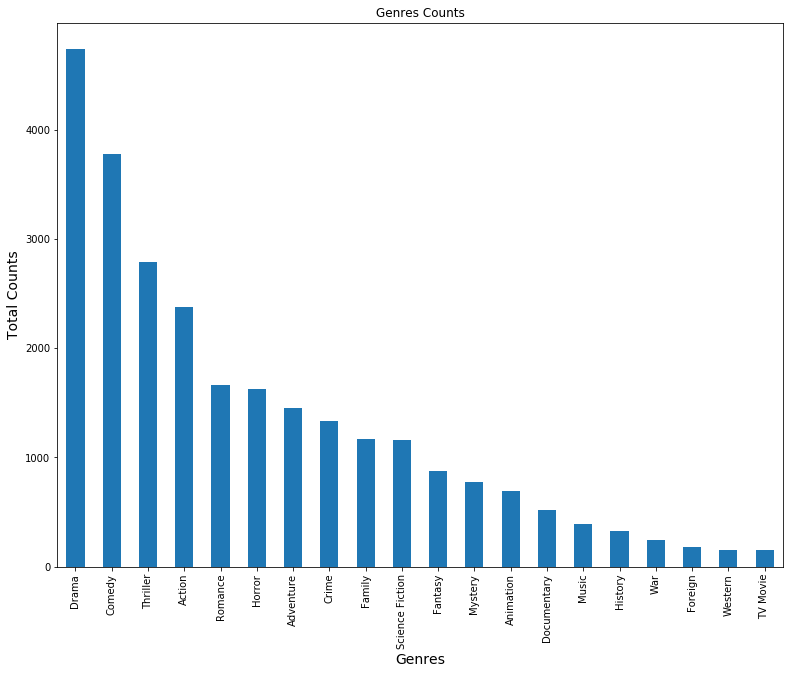

In [113]:
## plot 4-1 visulazied total words fo genres counts from 1960 to 2015
trend_genres.genres.value_counts().plot.bar(figsize=(13,10),title="Genres Counts")
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Total Counts',fontsize=14)

Text(0, 0.5, 'Genres Counts')

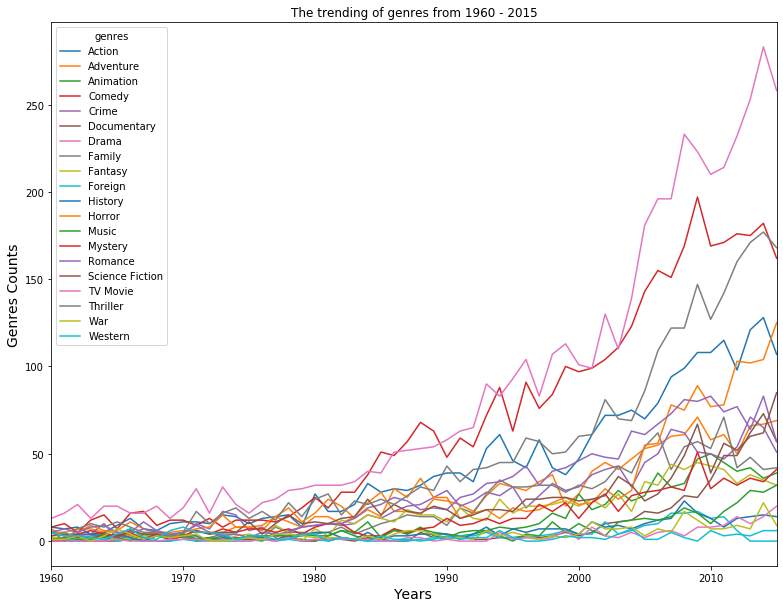

In [114]:
### plot 4-2 visualize the trending of genres from 1960 - 2010
trend_counts.plot.line(figsize=(13,10), title='The trending of genres from 1960 - 2015')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Genres Counts',fontsize=14)

In [ ]:
###  Note and Conclusion 

#### 1.	The data set (TMDB movie data) I analyzed was download from:   https://www.kaggle.com/tmdb/tmdb-movie-metadata.  

#### The data set being used for analysis is named “ tmdb_5000_movies.csv  


In [ ]:
### 2.	Questions I posted 

###Movie 
#### 1.	List the highest rating(or top 10) movies (base on weighted rating)
#### 2.	List the most(or top 10) profitable movies 

#### Genery
#### 1.	List the most profit Genery(or top 10)/or combination
#### 2.	List the highest score Genery(or top 10)
#### 3.	Find out the most frequent genres hit both “excellent rating and great profit ” category
#### 4.	Fin out the highest ratio of the genery hit “excellent rating and great profit ” category

#### Directors 
#### 1.	List the director(or top 10) has the most combined profit (all the movie he/she has directed)
#### 2.	List the director(or top 10) has the highest average movie score(all the movie he/she has directed)
#### 3.	List eh director (or top 10) has the most movies hit “excellent rating and great profit” category
#### 4.	Who(or top 10) has most movies been directed.


#### Production Companies
#### 1.	Which producton companies(or top 10) produced most movies hit “excellent rating and great profit” category
#### 2.	Which production companies(or top 10) produced movies with the highest ratio met “excellent rating and great profit” category



In [ ]:
### 3. Step I investigate those question:

#### 1.	Clean data set
#### 2.	Set up the formula (weighted rating) to calculate rating score.
#### 3.	Categorized all data  into 4 rating level
#### 4.	Create and append score ranking column
#### 5.	Calculate profit (revenue – budget)
#### 6.	Categorized all data into 4 profit level
#### 7.	Create and append profit ranking column
#### 8.	Combined and append the above
#### 9.	Find out the data set overlapping “excellent rating and great profit”
#### 10.	List out the data for movies, production companies, director, genery all hit the “excellent rating and great profit”
#### 11.	Calculate the ratio which hit “excellent rating and great profit” ( total frame and profit/total movies counts)
#### 12.	Create bar chart 


In [ ]:
### 4.Documentation of data wrangling I did
###  tmdb-movies.csv

#### Reference :

#### The movie rating score (‘weighted rating’) was referened
#### From “Ibtesam Ahmed” under Kaggle kernels.


In [ ]:
### 5.Conclusion : 

#### Analysis was based on 10866 row and 21 columns movies data. 

 ##### 44  row  ‘director’  data were missing
 ##### 23  row  ‘ genres ‘  data were missing



#### Genres :

##### plot 2-1, plot 2-2, plot 4-1 , plot 4-2

#### 1.	Genres key word or combine genres :  DRAMA ,CRIME, THRILLER,  MYSTERY, ACTION has higher ratio to meet ‘Great Profit’ movie compare to other genres.

#### 2.	Genres key word or combine genres :  DRAMA, HISTORY, THRILLER, WAR, FANTASY,ROANCE , CRIME,  FANTASY   has higher ratio to meet ‘ Excellent Rating’ compare to other genres.


#### 3.	Genres key word : DRAMA , CRIME, THRILLER has the highest ratio to meet both “Fame and profit ”

#### 4.	‘Drama’ dominances the ratio for   ‘ Fame and Profit’

#### 5.	Drama’ is also the most frequent occurrence element genres of all movies. There are about 5000 movies with drama elements. Followed by comedy and Thriller and Action.

#### 6.	 Data shows that Drama, Comedy and Thriller has the most robust trend from 1960 to 2015 compare the rest genres



In [ ]:
#### Production Company:

#### Plot 1-1, plot 1-2

#### Compared with other companies, the big 6 has a prominent performance in the film of "Fame and Fortune". Among them, Paramount Picture is particularly prominent in quantity and proportion.


In [ ]:
#### Data Correlation: 

#### Plot 3-1 , plot 3-2

#### Score Rating and Profit has positive correlate relation. But not a significant one.

#### Budget and Profit has positive correlate relation.


In [ ]:
#### Trend

#### plot 4-1, 4-2

### Drama, Comedy and Thriller has the robust trend from 1960 - 2015 compare to other genres.

In [ ]:
### About the Analysis

#### I made this report is to serve as a reference for the film investors. If you want to invest in a movie , some questions would be likes : what kind of genres and what kind of directors will be used , what kind of production companies will you cooperate with, or how large-scale investment will you intend to commit in return for a greater chance of producing "fame and gain" movies.   Of course, we understand that the above data can only be used as a statistic to explain some aspect of the industry, and true artistic creation contains more specific factors. But the above data can serve as a reference for a different angle of a bigger picture for the investors.

#### The lack of some movie data also affects the accuracy of the analysis.


In [ ]:
### I have attached a pdf version Excel file in the conpress files for more communication. 